### Library import

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

### Helper function

In [18]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HERE
    raw_image = Image.open(img_path).convert("RGB") 
    return raw_image

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    plt.imshow(img_2d)

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img_2d.save(img_path)

### 1. Adjust Brightness

In [19]:
def adjust_Brightness (img_2d, brightness):
    return np.uint8(np.clip(img_2d + np.array([brightness], dtype=np.int16), 0, 255))    

In [20]:
def perform_brightness(img_2d, result_path, img_name, fmat):
    brightness = input('Enter brightness [-255:255]: ')
    result = adjust_Brightness(img_2d, brightness)
    result_path = result_path + img_name + "_" + str(brightness) + "_brightness" + fmat
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)

### 2. Adjust Contrast

In [21]:
def adjust_Contrast (img_2d, contrast):
    contrast = np.clip(float(contrast), -255, 255)
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    return np.uint8(np.clip(factor * (img_2d.astype(float) - 128) + 128, 0, 255))

In [22]:
def perform_Contrast (img_2d, result_path, img_name, fmat):
    contrast = input('Enter contrast [-255:255]: ')
    result = adjust_Contrast(img_2d, contrast)
    result_path = result_path + img_name + "_" + str(contrast) + "_contrast" + fmat
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)

### 3. Flip image

In [23]:
def flip(img, direction):
    if direction == 'vertical':
        return np.flipud(img)
    elif direction == 'horizontal':
        return np.fliplr(img)

In [24]:
def perform_flip(img, result_path, img_name, fmat):
    print("""
    1. Vertical
    2. Horizontal
    """)
    direction = input("Enter direction: ")
    if direction == '1':
        direction = 'vertical'
    elif direction == '2':
        direction = 'horizontal'
    result = flip(img, direction)
    result_path = result_path + img_name + "_" + str(direction) + fmat
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)

### 4. GreyScale Image

In [25]:
def convert_to_grayscale (img_2d):
    weight = np.array([0.299, 0.587, 0.114])
    return np.uint8(np.dot(img_2d[..., :3], weight))

In [26]:
def perform_grayscale (img_2d, result_path, img_name, fmat):
    result = convert_to_grayscale(img_2d)
    result_path = result_path + img_name + "_grayscale" + fmat
    img_result = Image.fromarray(np.uint8(result))
    show_img(result)
    save_img(img_result, result_path)

### 5. Blend 2 images

In [27]:
def blend_two_images (img1_2d, img2_2d, alpha):
    return np.uint8(img1_2d * (1.0 - alpha) + img2_2d * alpha)

In [28]:
def perform_blend (img1_2d, img2_2d, result_path, img_name, fmat):
    alpha = 0.5
    result = blend_two_images(img1_2d, img2_2d, alpha)
    img_result = Image.fromarray(np.uint8(result))
    result_path = result_path + img_name + "_blend" + fmat
    show_img(result)
    save_img(img_result, result_path)

### Main

In [29]:
def main():
    print("Enter image path: ")
    img_path = input()

    # Parsing input path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    result_path = img_path[0:img_name_idx-len(img_name)]
    format = img_path[img_name_idx:len(img_path)]

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray
    pic = np.array(raw_img)
    show_img(pic)
    #perform_brightness(pic, result_path, img_name, format)
    #perform_flip(pic, result_path, img_name, format)
    perform_grayscale(pic, result_path, img_name, format)

Enter image path: 


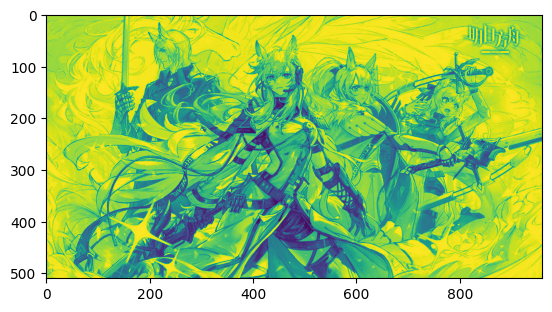

In [30]:
# Call main here
main()